## Musinsa Customal's Viewpoint - Delivery Date

    작성자 : 조예슬
    
    상품 배송소요일에 따른 고객의 상품 만족도 상관관계 알아보기
    
    - MySQL을 이용하여 데이터 전처리 진행
    - 상품 랭킹에서 선정됐던 대분류 4가지(상의, 아우터, 바지, 스니커)의 고객의 만족도을 알아보고, 시각화시키기

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

import MySQLdb

In [4]:
config = {"host":"192.168.0.44", "user":"musinsa", "password":"1111", "database":"PR_TEST", "charset":'utf8'}
conn = MySQLdb.connect(**config)

In [5]:
# MAJOR_CODE = 1, 배송소요일 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, P.AVG_DELDATE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
  AND CA.MAJOR_CODE = '001'
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

sat1_columns = ["MAJOR_CODE", "AVG_DELDATE", "SATISFACTION"]

sat1= pd.DataFrame(arr, columns=sat1_columns)

# string -> float
sat1["AVG_DELDATE"] = sat1["AVG_DELDATE"].astype(float)
sat1["SATISFACTION"] = sat1["SATISFACTION"].astype(float)

sat1.sort_values(by="AVG_DELDATE", ascending=False)

,MAJOR_CODE,AVG_DELDATE,SATISFACTION
489,001,3.6,70.00
712,001,3.3,92.22
87,001,2.8,97.50
717,001,2.5,100.00
598,001,2.5,90.00
...,...,...,...
642,001,0.9,88.00
447,001,0.9,90.70
454,001,0.9,94.78
696,001,0.9,100.00


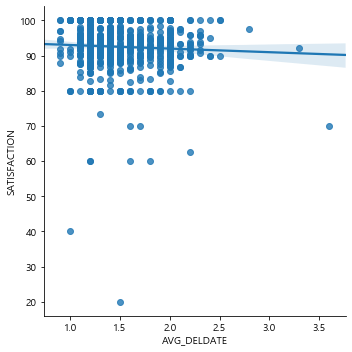

In [6]:
# MAJOR_CODE = 1, 배송소요일 + 만족도 : 시각화
sns.lmplot( x = "AVG_DELDATE", y = "SATISFACTION", data = sat1)

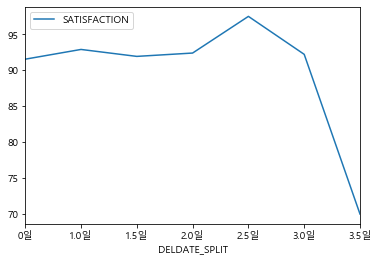

In [9]:
# MAJOR_CODE = 1, 구간별로 나누어 보기

bins = [-1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
labels = ['0일', '1.0일', '1.5일', '2.0일', '2.5일',
          '3.0일', '3.5일']
sat1["DELDATE_SPLIT"] = pd.cut(sat1["AVG_DELDATE"], bins=bins, labels=labels)

sat1_b = sat1.pivot_table("SATISFACTION", "DELDATE_SPLIT")
sat1_b.plot()

In [10]:
# MAJOR_CODE = 2, 배송소요일 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, P.AVG_DELDATE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
  AND CA.MAJOR_CODE = '002'
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

sat2_columns = ["MAJOR_CODE", "AVG_DELDATE", "SATISFACTION"]

sat2= pd.DataFrame(arr, columns=sat2_columns)

# string -> float
sat2["AVG_DELDATE"] = sat2["AVG_DELDATE"].astype(float)
sat2["SATISFACTION"] = sat2["SATISFACTION"].astype(float)

sat2.sort_values(by="AVG_DELDATE", ascending=False)

,MAJOR_CODE,AVG_DELDATE,SATISFACTION
345,002,3.3,100.00
200,002,3.3,92.30
328,002,3.2,93.88
294,002,3.1,96.48
7,002,2.5,96.00
...,...,...,...
165,002,0.9,100.00
182,002,0.9,100.00
195,002,0.9,83.54
297,002,0.9,100.00


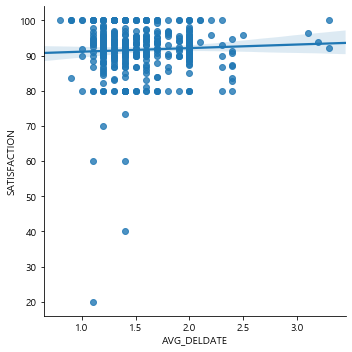

In [11]:
# MAJOR_CODE = 2, 배송소요일 + 만족도 : 시각화
sns.lmplot( x = "AVG_DELDATE", y = "SATISFACTION", data = sat2)

In [ ]:
sat2 = sat2.loc[sat2["SATISFACTION"] < 70]

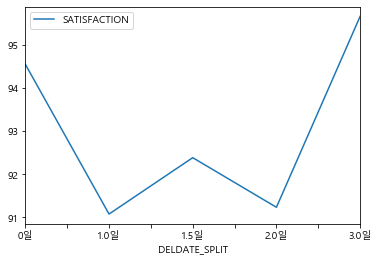

In [12]:
# MAJOR_CODE = 2, 구간별로 나누어 보기

bins = [-1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
labels = ['0일', '1.0일', '1.5일', '2.0일', '2.5일',
          '3.0일', '3.5일']
sat2["DELDATE_SPLIT"] = pd.cut(sat2["AVG_DELDATE"], bins=bins, labels=labels)

sat2_b = sat2.pivot_table("SATISFACTION", "DELDATE_SPLIT")
sat2_b.plot()

In [13]:
# MAJOR_CODE = 3, 배송소요일 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, P.AVG_DELDATE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
  AND CA.MAJOR_CODE = '003'
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

sat3_columns = ["MAJOR_CODE", "AVG_DELDATE", "SATISFACTION"]

sat3= pd.DataFrame(arr, columns=sat3_columns)

# string -> float
sat3["AVG_DELDATE"] = sat3["AVG_DELDATE"].astype(float)
sat3["SATISFACTION"] = sat3["SATISFACTION"].astype(float)

sat3.sort_values(by="AVG_DELDATE", ascending=False)

,MAJOR_CODE,AVG_DELDATE,SATISFACTION
120,003,2.5,80.00
279,003,2.4,95.00
267,003,2.3,80.00
29,003,2.3,95.00
204,003,2.3,100.00
...,...,...,...
81,003,1.0,90.00
23,003,1.0,100.00
82,003,0.9,90.00
112,003,0.8,85.72


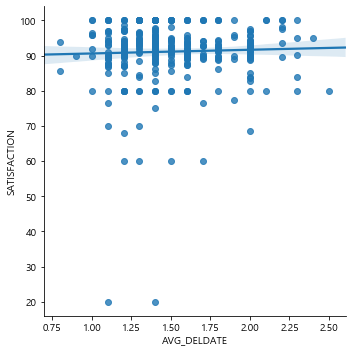

In [14]:
# MAJOR_CODE = 2, 배송소요일 + 만족도 : 시각화
sns.lmplot( x = "AVG_DELDATE", y = "SATISFACTION", data = sat3)

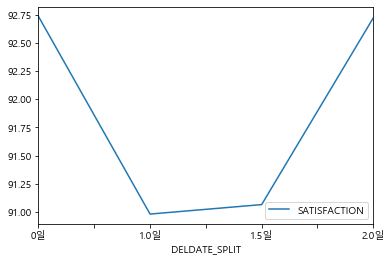

In [15]:
# MAJOR_CODE = 3, 구간별로 나누어 보기

bins = [-1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
labels = ['0일', '1.0일', '1.5일', '2.0일', '2.5일',
          '3.0일', '3.5일']
sat3["DELDATE_SPLIT"] = pd.cut(sat3["AVG_DELDATE"], bins=bins, labels=labels)

sat3_b = sat3.pivot_table("SATISFACTION", "DELDATE_SPLIT")
sat3_b.plot()

In [19]:
# MAJOR_CODE = 18, 배송소요일 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, P.AVG_DELDATE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
  AND CA.MAJOR_CODE = '018'
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

sat18_columns = ["MAJOR_CODE", "AVG_DELDATE", "SATISFACTION"]

sat18= pd.DataFrame(arr, columns=sat18_columns)

# string -> float

sat18["SATISFACTION"] = sat18["SATISFACTION"].astype(float)
sat18["AVG_DELDATE"] = pd.to_numeric(sat18["AVG_DELDATE"], errors='coerce')

sat18.sort_values(by="AVG_DELDATE", ascending=False)

,MAJOR_CODE,AVG_DELDATE,SATISFACTION
77,018,8.3,95.00
27,018,3.9,81.82
0,018,2.0,94.58
51,018,2.0,94.40
88,018,2.0,91.42
...,...,...,...
24,018,1.1,20.00
68,018,1.1,97.78
55,018,1.0,95.58
1,018,1.0,83.34


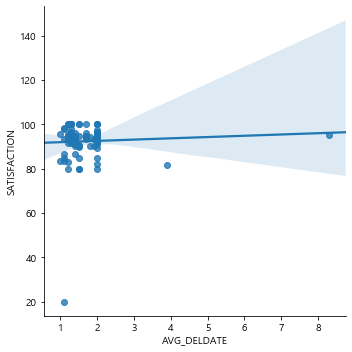

In [20]:
# MAJOR_CODE = 2, 배송소요일 + 만족도 : 시각화
sns.lmplot( x = "AVG_DELDATE", y = "SATISFACTION", data = sat18)

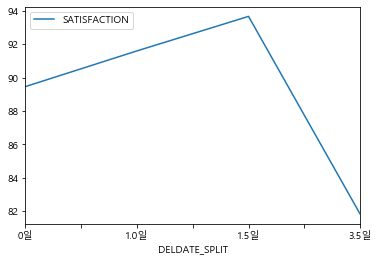

In [21]:
# MAJOR_CODE = 3, 구간별로 나누어 보기

bins = [-1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
labels = ['0일', '1.0일', '1.5일', '2.0일', '2.5일',
          '3.0일', '3.5일']
sat18["DELDATE_SPLIT"] = pd.cut(sat18["AVG_DELDATE"], bins=bins, labels=labels)

sat18_b = sat18.pivot_table("SATISFACTION", "DELDATE_SPLIT")
sat18_b.plot()

In [23]:
# 전체, 배송소요일 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, P.AVG_DELDATE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

satt_columns = ["MAJOR_CODE", "AVG_DELDATE", "SATISFACTION"]

satt= pd.DataFrame(arr, columns=satt_columns)

# string -> float

satt["SATISFACTION"] = satt["SATISFACTION"].astype(float)
satt["AVG_DELDATE"] = pd.to_numeric(satt["AVG_DELDATE"], errors='coerce')

satt.sort_values(by="AVG_DELDATE", ascending=False)

,MAJOR_CODE,AVG_DELDATE,SATISFACTION
1651,005,9.4,99.02
1658,005,9.0,98.18
1956,018,8.3,95.00
1635,005,8.2,96.66
1649,005,8.2,100.00
...,...,...,...
1011,002,0.8,100.00
1259,003,0.8,85.72
1588,004,0.7,100.00
1489,004,0.6,80.00


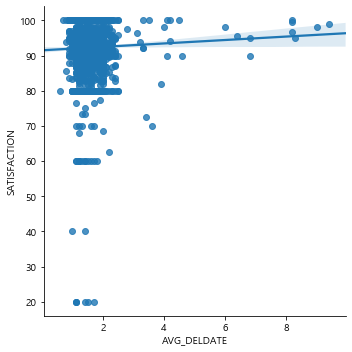

In [24]:
# MAJOR_CODE = 2, 배송소요일 + 만족도 : 시각화
sns.lmplot( x = "AVG_DELDATE", y = "SATISFACTION", data = satt)

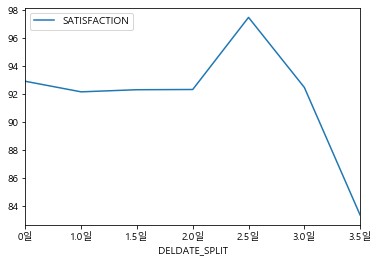

In [25]:
# MAJOR_CODE = 3, 구간별로 나누어 보기

bins = [-1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
labels = ['0일', '1.0일', '1.5일', '2.0일', '2.5일',
          '3.0일', '3.5일']
satt["DELDATE_SPLIT"] = pd.cut(satt["AVG_DELDATE"], bins=bins, labels=labels)

satt_b = satt.pivot_table("SATISFACTION", "DELDATE_SPLIT")
satt_b.plot()

### 최종 결론

    상의 구매시에 배송소요일이 3일 이상 넘어 갈때에 고객의 만족도는 감소하는 경향을 보인다.
    이를 제외하고는 배송소요일에 따라 고객의 만족도는 큰 차이를 보이지 않음